# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


In [4]:
!pip install --upgrade scikit-learn scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 60.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [1]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from google.colab import drive


import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Model Choice

We tried a linear regression model and a random forest model because both seemed suitable for our task (predicting the production with 1-2 parameters) In the end we decided on the linear regression model, because it seemed to work best.


## Feature Selection

As features, we selected the average temperature and the Sunshine duration, we know there is a linear relationship between the  solar radiation and the production, bbut the solar radiation is also harder to predict. So we decided to use two different parameters, which should be closely related to the production, which are easier to predict



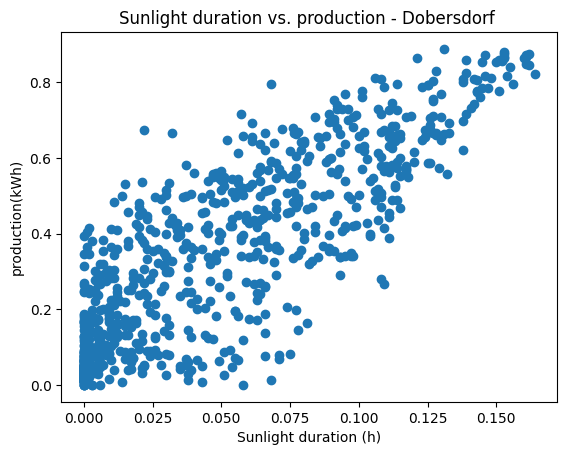

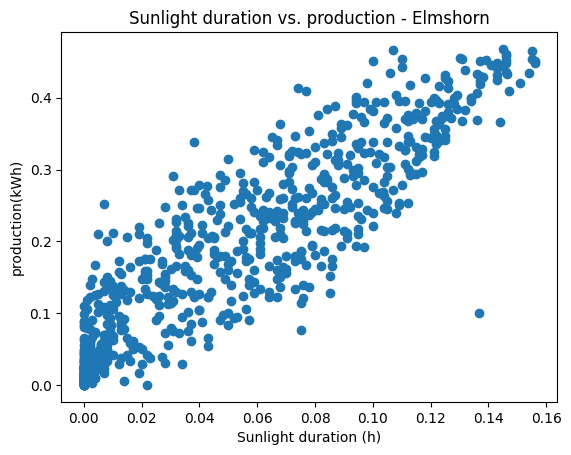

X nan: False
y nan: False
X inf: False
y inf: False
X nan: False
y nan: False
X inf: False
y inf: False


In [14]:


from math import nan
# Load the dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dobersdorf_all_cut.csv', sep=";", decimal=",", header=0)
df_elmshorn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Elmshorn_PV.csv', sep=";", decimal=",", header=0)


# Feature selection
# Example: Selecting only two features for a simple baseline model
X = df[['Sun','Tavg']]
y = df['Produktion(kWH)']
n_y= y/100
n_x= X/100

X1 = df_elmshorn[['Sun','Tavg']]
y1 = df_elmshorn['Power Generation [kWh]']
n_y1= y1/100
n_x1= X1/100


# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(n_x, n_y, test_size=0.2, random_state=42)

##elmshorn
X_train1, X_test1, y_train1, y_test1 = train_test_split(n_x1, n_y1, test_size=0.2, random_state=42)
###Dobersdorf
plt.scatter(n_x['Sun'], n_y)
plt.xlabel('Sunlight duration (h)')
plt.ylabel('production(kWh)')
plt.title('Sunlight duration vs. production - Dobersdorf ')
plt.show()

##elmshorn
plt.scatter(n_x1['Sun'], n_y1)
plt.xlabel('Sunlight duration (h)')
plt.ylabel('production(kWh)')
plt.title('Sunlight duration vs. production - Elmshorn')
plt.show()

###here we had to exclude missing values
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)

print("X nan:", np.isnan(X_train).any())
print("y nan:", np.isnan(y_train).any())
print("X inf:", np.isinf(X_train).any())
print("y inf:", np.isinf(y_train).any())

X_train1 = np.nan_to_num(X_train1, nan=0.0, posinf=0.0, neginf=0.0)
print("X nan:", np.isnan(X_train1).any())
print("y nan:", np.isnan(y_train1).any())
print("X inf:", np.isinf(X_train1).any())
print("y inf:", np.isinf(y_train1).any())





In [3]:
print(X_train1.shape)
print(y_train1.shape)
print(X_train.shape)
print(y_train.shape)

(624, 2)
(624,)
(673, 2)
(673,)


## Implementation

[Implement your baseline model here.]



In [12]:

import sklearn
import scikeras

from tensorflow import keras

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

import scikeras
from scikeras.wrappers import KerasRegressor



model = keras.Sequential([
    keras.Input(shape=(2,)),
    keras.layers.Dense(1, activation="linear")
])


# TODO Compile the model
model.compile(
loss= keras.losses.MeanSquaredError(),
optimizer= keras.optimizers.Adam(learning_rate=0.001),
metrics=["mae"]
               )
##cross validation
reg = KerasRegressor(
    model= model,
    epochs=50,
    batch_size=16
)

scores = cross_val_score(reg , X_train, y_train, cv=5, scoring='neg_mean_squared_error', error_score='raise')

print("MSE for each fold:", -scores)
print("Average MSE:", -np.mean(scores))
print("Standard deviation:", -np.std(scores))

# Train final model on all training data
model.fit(X_train, y_train)
print(np.isnan(scores))




Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2325 - mae: 0.3969
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1975 - mae: 0.3601 
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1743 - mae: 0.3337 
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1381 - mae: 0.2888
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1308 - mae: 0.2836
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1123 - mae: 0.2644
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0957 - mae: 0.2411
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0920 - mae: 0.2451
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0798 - mae: 0.2326
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0758 - mae: 0.2283
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0698 - mae: 0.2230
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0675 - mae: 0.2178
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2321 - mae: 0.4034
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1897 - mae: 0.3475
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1828 - mae: 0.3466
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1665 - mae: 0.3273 
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1407 - mae: 0.2942 
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1165 - mae: 0.2752 
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0992 - mae: 0.2526 
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0940 - mae: 0.2518 
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0849 - mae: 0.2412 
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0785 - mae: 0.2346 
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0688 - mae: 0.2236 
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0665 - mae: 0.2251 
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2295 - mae: 0.4014   
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1871 - mae: 0.3538 
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1566 - mae: 0.3119 
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1439 - mae: 0.2952 
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1367 - mae: 0.2898 
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1060 - mae: 0.2550 
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0927 - mae: 0.2379
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0847 - mae: 0.2329 
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0841 - mae: 0.2366 
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0730 - mae: 0.2252
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0779 - mae: 0.2330 
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0633 - mae: 0.2150
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2118 - mae: 0.3757
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1827 - mae: 0.3446 
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1590 - mae: 0.3118 
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1437 - mae: 0.2975
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1294 - mae: 0.2790 
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1072 - mae: 0.2549 
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0933 - mae: 0.2416 
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0840 - mae: 0.2340 
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0796 - mae: 0.2339 
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0700 - mae: 0.2185 
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0687 - mae: 0.2211 
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0628 - mae: 0.2104 
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2171 - mae: 0.3867   
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1827 - mae: 0.3413 
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1698 - mae: 0.3292 
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1418 - mae: 0.2915 
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1246 - mae: 0.2781 
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1091 - mae: 0.2632 
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1036 - mae: 0.2606
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0886 - mae: 0.2427
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0845 - mae: 0.2383 
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0761 - mae: 0.2325
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0733 - mae: 0.2282 
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0636 - mae: 0.2141 
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [15]:
###for Elmshorn



model1 = keras.Sequential([
    keras.Input(shape=(2,)),
    keras.layers.Dense(1, activation="linear")
])


# TODO Compile the model
model1.compile(
loss= keras.losses.MeanSquaredError(),
optimizer= keras.optimizers.Adam(learning_rate=0.001),
metrics=["mae"]
               )

##cross validation
reg1 = KerasRegressor(
    model= model1,
    epochs=50,
    batch_size=16
)

scores1 = cross_val_score(reg1, X_train1, y_train1, cv=5, scoring='neg_mean_squared_error', error_score='raise')

print("MSE for each fold(E):", -scores1)
print("Average MSE(E):", -np.mean(scores1))
print("Standard deviation:", -np.std(scores1))

# Train final model on all training data
model1.fit(X_train1, y_train1)
print(np.isnan(scores1))

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0384 - mae: 0.1496
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0294 - mae: 0.1319
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0224 - mae: 0.1172
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 - mae: 0.1150
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0190 - mae: 0.1133
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mae: 0.1084
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 - mae: 0.1019
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0157 - mae: 0.1068
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0147 - mae: 0.1033
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148 - mae: 0.1035
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0135 - mae: 0.0991
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0145 - mae: 0.1026
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0422 - mae: 0.1595
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0321 - mae: 0.1390 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0251 - mae: 0.1252 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0198 - mae: 0.1143
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0183 - mae: 0.1116 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168 - mae: 0.1084 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143 - mae: 0.1022 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0157 - mae: 0.1085 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151 - mae: 0.1049 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140 - mae: 0.1011 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0159 - mae: 0.1086 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143 - mae: 0.1032 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0454 - mae: 0.1667   
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0319 - mae: 0.1362 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0233 - mae: 0.1182 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - mae: 0.1141 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 - mae: 0.1139 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0161 - mae: 0.1075 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0162 - mae: 0.1098
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0135 - mae: 0.1009 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 - mae: 0.1067 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146 - mae: 0.1036
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0142 - mae: 0.1028
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mae: 0.1010
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0402 - mae: 0.1538   
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0316 - mae: 0.1355 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0242 - mae: 0.1231 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188 - mae: 0.1087 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172 - mae: 0.1087 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 - mae: 0.1045 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153 - mae: 0.1059 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 - mae: 0.1061 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 - mae: 0.1088 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0157 - mae: 0.1079 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150 - mae: 0.1049 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151 - mae: 0.1057 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0411 - mae: 0.1601   
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0317 - mae: 0.1367 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0246 - mae: 0.1245
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0195 - mae: 0.1126 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0174 - mae: 0.1091 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 - mae: 0.1025 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - mae: 0.1055 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150 - mae: 0.1045 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - mae: 0.1069 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143 - mae: 0.1028 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141 - mae: 0.1029 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140 - mae: 0.1019 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [16]:
print("MSE for each fold:", -scores)
print("Average MSE:", -np.mean(scores))
print("Standard deviation:", -np.std(scores))
print("final score:",-np.mean(scores),"+-",np.std(scores))
print("final score(Elmshorn):",-np.mean(scores1),"+-",np.std(scores1))

MSE for each fold: [0.038164   0.03535508 0.03970572 0.03811346 0.03717697]
Average MSE: 0.03770304743300486
Standard deviation: -0.0014269779564525962
final score: 0.03770304743300486 +- 0.0014269779564525962
final score(Elmshorn): 0.006979949972280802 +- 0.0006735321808358208


## Evaluation

To evaluate our model, we used mse



In [21]:
# Evaluate the baseline model

model.evaluate(X_train,y_train)

# TODO Make predictions
forecast = model.predict(X_test)
mse = mean_squared_error(y_test, forecast)
print(mse)



###for Elmshorn
# Evaluate the baseline model

model1.evaluate(X_train1,y_train1)


forecast1 = model1.predict(X_test1)
mse1 = mean_squared_error(y_test1, forecast1)
print(mse1)





22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2053 - mae: 0.3698 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.21036138626401618
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0361 - mae: 0.1462 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
0.04143120464294666
